In [1]:
##Importing all the necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
##Reading the dataset

data = pd.read_csv('bank-full.csv')

In [3]:
##Performing EDA

In [4]:
#Getting the overview of the data
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Getting the shape of the data
data.shape

(45211, 17)

In [7]:
#Checking for null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
#From above information seems like there is no missing values

In [9]:
#Checking correlation b/w variables
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


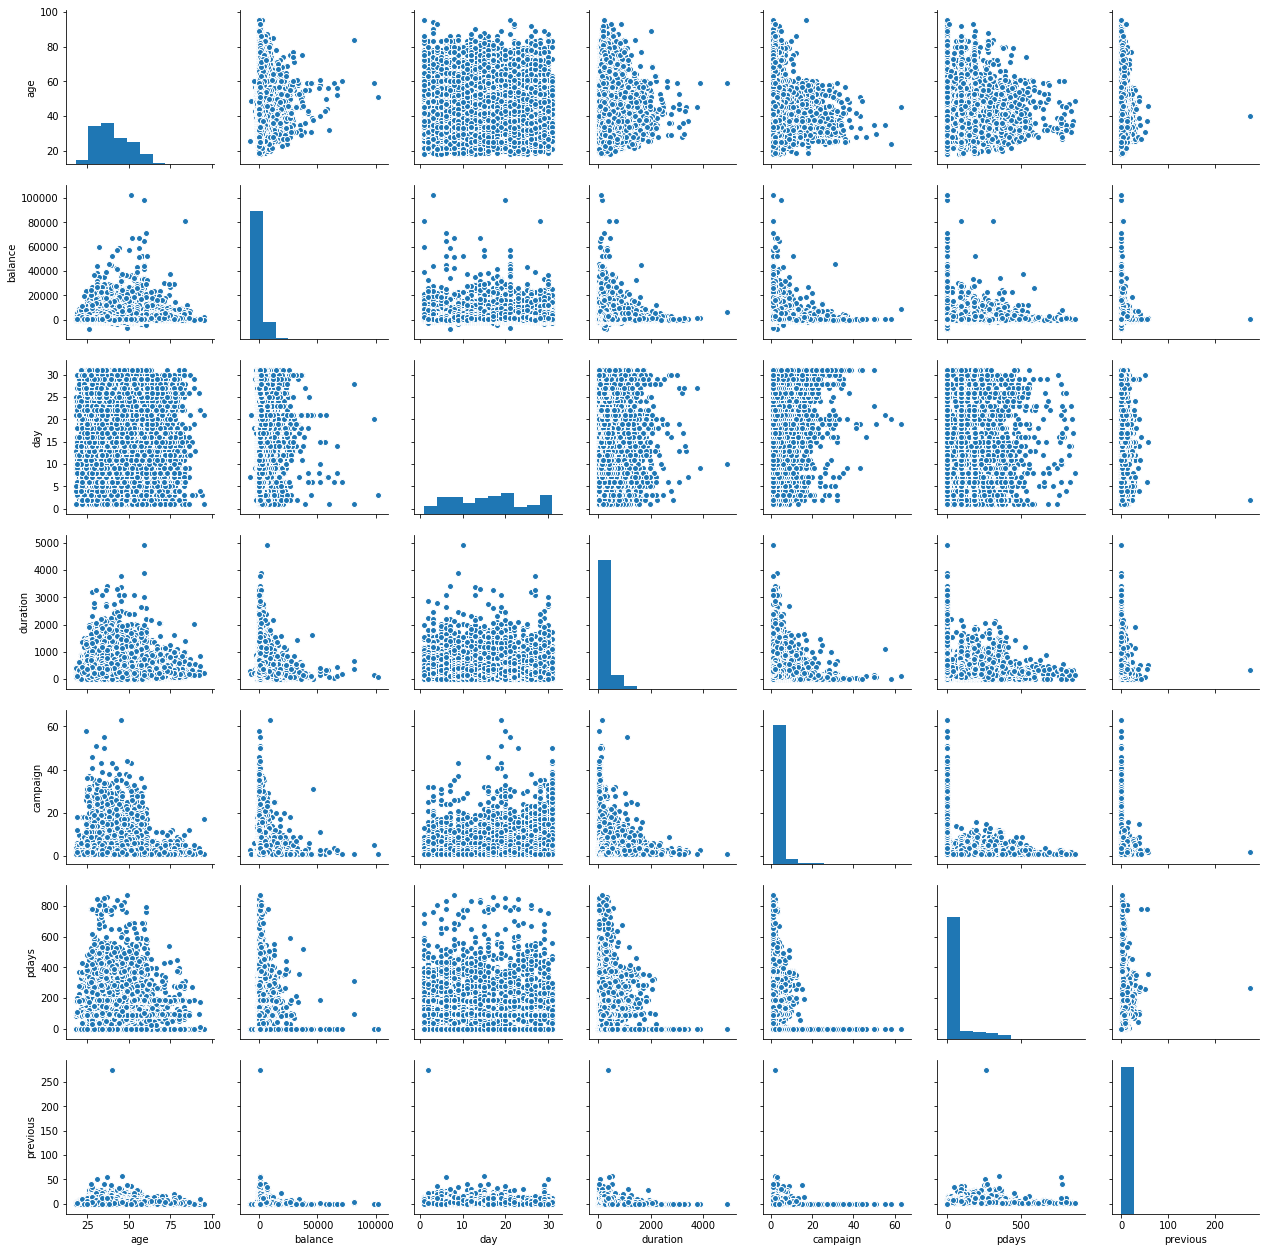

In [10]:
sns.pairplot(data)

In [11]:
#Checking 5 points summary of the give data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [12]:
#It seems like we have quiet a few outliers across each variables

In [13]:
#Lets plot each variable to understand the 5 points summary, distribution of data and outliers

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


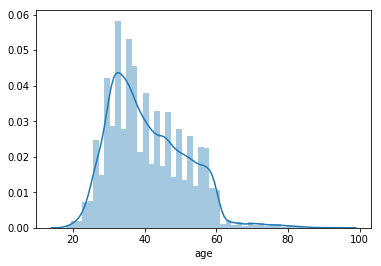

In [14]:
#Ploting Age
sns.distplot(data['age'])

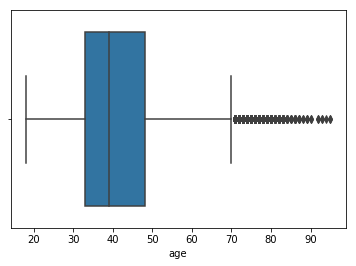

In [15]:
sns.boxplot(data['age'])

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


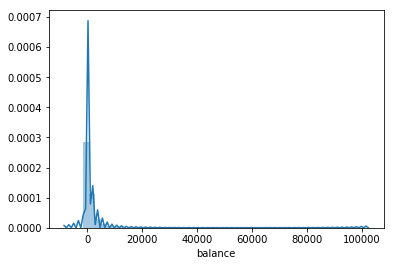

In [16]:
#Plotting Balance
sns.distplot(data['balance'])

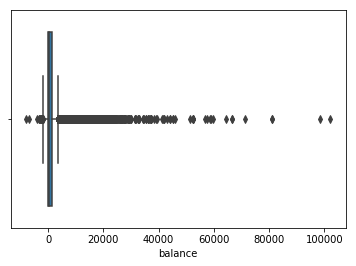

In [17]:
sns.boxplot(data['balance'])

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


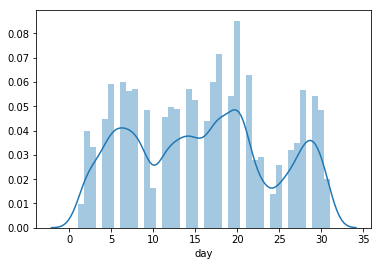

In [18]:
#Ploting Day
sns.distplot(data['day'])

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


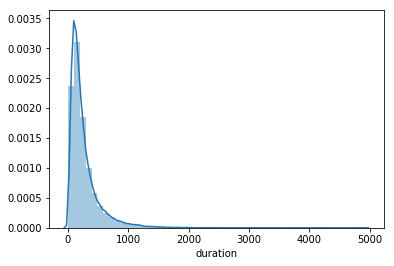

In [19]:
#Plotting Duration
sns.distplot(data['duration'])

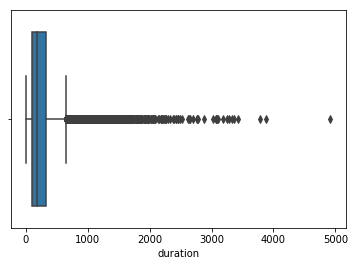

In [20]:
sns.boxplot(data['duration'])

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


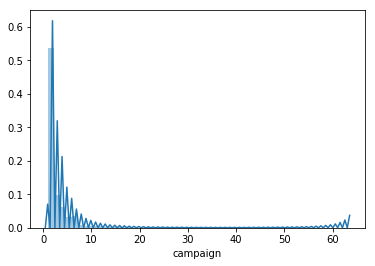

In [21]:
#Plotting Campaign
sns.distplot(data['campaign'])

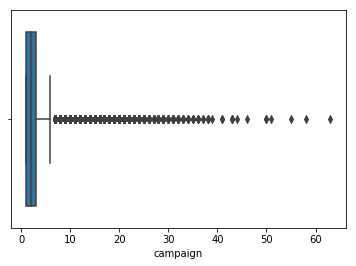

In [22]:
sns.boxplot(data['campaign'])

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


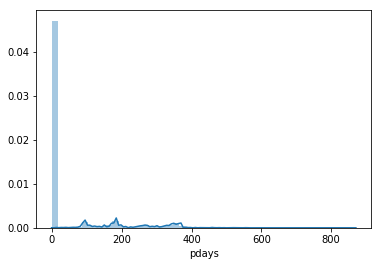

In [23]:
#Ploting pdays
sns.distplot(data['pdays'])

C:\Users\vignesa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


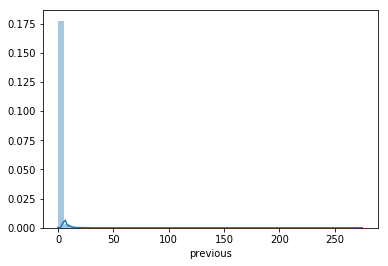

In [24]:
#Plotting previous
sns.distplot(data['previous'])

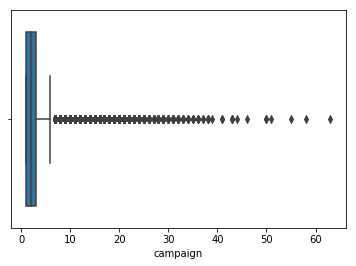

In [25]:
sns.boxplot(data['campaign'])

In [26]:
#Checking the datatypes for each attributes
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [27]:
#From above EDA it is found that we have few string/object variables and these need to changed as categorical, no missing values but there are quiet a few outliers

In [28]:
#Preparing the data for training

In [29]:
#As object data type is not supported for Decision Tree, changing data types to categorical

for attribute in data.columns:
    if data[attribute].dtype == 'object':
        data[attribute] = pd.Categorical(data[attribute])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [31]:
print(data.job.value_counts())
print(data.marital.value_counts())
print(data.education.value_counts())
print(data.default.value_counts())
print(data.housing.value_counts())
print(data.loan.value_counts())
print(data.contact.value_counts())
print(data.month.value_counts())
print(data.poutcome.value_counts())
print(data.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [32]:
organize = { "job": {"unknown":-1, "student":1, "unemployed":2, "housemaid":3, "self-employed":4, "retired":5, "technician":6, "admin.":7, "services":8, "entrepreneur":9, "management":10, "blue-collar":11},
           "education": {"unknown":-1, "primary":1, "secondary":2, "tertiary":3},
           "default": {"no": 0, "yes": 1},
           "housing": {"no": 0, "yes": 1},
           "loan": {"no": 0, "yes": 1},
           "Target": {"no": 0, "yes": 1}}

OneHotCols = ["poutcome","month","contact","marital"]

In [33]:
data = data.replace(organize)
data = pd.get_dummies(data, columns = OneHotCols)
data.head(10)

,age,job,education,default,balance,housing,loan,day,duration,campaign,...,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single
0,58,10,3,0,2143,1,0,5,261,1,...,1,0,0,0,0,0,1,0,1,0
1,44,6,2,0,29,1,0,5,151,1,...,1,0,0,0,0,0,1,0,0,1
2,33,9,2,0,2,1,1,5,76,1,...,1,0,0,0,0,0,1,0,1,0
3,47,11,-1,0,1506,1,0,5,92,1,...,1,0,0,0,0,0,1,0,1,0
4,33,-1,-1,0,1,0,0,5,198,1,...,1,0,0,0,0,0,1,0,0,1
5,35,10,3,0,231,1,0,5,139,1,...,1,0,0,0,0,0,1,0,1,0
6,28,10,3,0,447,1,1,5,217,1,...,1,0,0,0,0,0,1,0,0,1
7,42,9,3,1,2,1,0,5,380,1,...,1,0,0,0,0,0,1,1,0,0
8,58,5,1,0,121,1,0,5,50,1,...,1,0,0,0,0,0,1,0,1,0
9,43,6,2,0,593,1,0,5,55,1,...,1,0,0,0,0,0,1,0,0,1


In [34]:
data.dtypes

age                  int64
job                  int64
education            int64
default              int64
balance              int64
housing              int64
loan                 int64
day                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
Target               int64
poutcome_failure     uint8
poutcome_other       uint8
poutcome_success     uint8
poutcome_unknown     uint8
month_apr            uint8
month_aug            uint8
month_dec            uint8
month_feb            uint8
month_jan            uint8
month_jul            uint8
month_jun            uint8
month_mar            uint8
month_may            uint8
month_nov            uint8
month_oct            uint8
month_sep            uint8
contact_cellular     uint8
contact_telephone    uint8
contact_unknown      uint8
marital_divorced     uint8
marital_married      uint8
marital_single       uint8
dtype: object

In [35]:
#Distribution of Target variable
data['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

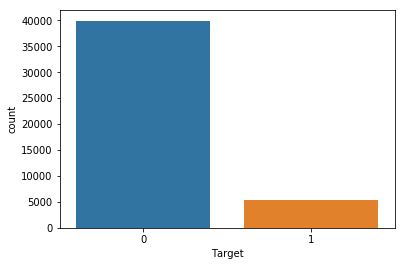

In [36]:
sns.countplot(data['Target'])

In [37]:
#From above plot it looks like Target varible is not balanced as we can see huge difference b/w their counts

In [38]:
#Splitting the data for training the model
X = data.drop("Target", axis=1)
Y = data["Target"]

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [40]:
X_train.shape,X_test.shape

((31647, 34), (13564, 34))

In [41]:
Y_train.shape,Y_test.shape

((31647,), (13564,))

In [42]:
#Training different classification models to get the best model

In [43]:
#Model 1 -> Logistic Regression

In [44]:
logreg = LogisticRegression(class_weight='balanced')

In [45]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [46]:
#Performance of the model
print(logreg.score(X_train,Y_train))
print(logreg.score(X_test,Y_test))

0.8448510127342244
0.8431878501916839


In [47]:
#Accuracy of the logistic regression model
lr_predict_train = logreg.predict(X_train)
lr_predict_test = logreg.predict(X_test)
LG_accuracy_score_train = metrics.accuracy_score(Y_train,lr_predict_train)
LG_accuracy_score_test = metrics.accuracy_score(Y_test,lr_predict_test)
print(LG_accuracy_score_train)
print(LG_accuracy_score_test)

0.8448510127342244
0.8431878501916839


In [48]:
#Confusion Matrix
cm = metrics.confusion_matrix(Y_test,lr_predict_test, labels=[1,0])
cm

array([[ 1263,   288],
       [ 1839, 10174]], dtype=int64)

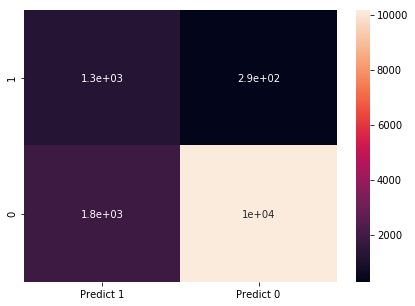

In [49]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [50]:
LG_recall_score_train = metrics.recall_score(Y_train,lr_predict_train)
LG_recall_score_test = metrics.recall_score(Y_test,lr_predict_test)
print(LG_recall_score_train)
print(LG_recall_score_test)

0.8146067415730337
0.8143133462282398


In [51]:
#For Logistic Regression model, performance we are getting around 84% with scaled weight and recall we are getting around 81%. Model looks decent but we can try with some more classifiers

In [52]:
#Model 2 -> KNN classifier

In [53]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)

XScaled.describe()

,age,job,education,default,balance,housing,loan,day,duration,campaign,...,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,...,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,-3.271794e-15,-3.427835e-14,4.520540e-15,3.070663e-15,1.382298e-14,-1.275129e-14,-9.219436e-15,5.560938e-17,1.254699e-14,...,7.421982e-14,-9.714164e-14,-5.102876e-14,5.457301e-14,1.085783e-13,7.248147e-14,9.608616e-14,8.782426e-15,3.787518e-15,-2.516489e-15
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.159707e+00,-3.344586e+00,-1.354899e-01,-3.081149e+00,-1.118674e+00,-4.368035e-01,-1.779108e+00,-1.002478e+00,-5.693506e-01,...,-6.616496e-01,-3.102635e-01,-1.288190e-01,-1.138980e-01,-1.356030e+00,-2.620909e-01,-6.359724e-01,-3.607797e-01,-1.229691e+00,-6.280903e-01
25%,-7.473845e-01,-6.588265e-01,-2.153577e-02,-1.354899e-01,-4.237719e-01,-1.118674e+00,-4.368035e-01,-9.380027e-01,-6.025167e-01,-5.693506e-01,...,-6.616496e-01,-3.102635e-01,-1.288190e-01,-1.138980e-01,-1.356030e+00,-2.620909e-01,-6.359724e-01,-3.607797e-01,-1.229691e+00,-6.280903e-01
50%,-1.823406e-01,5.571087e-02,-2.153577e-02,-1.354899e-01,-3.002800e-01,8.939154e-01,-4.368035e-01,2.326031e-02,-3.035165e-01,-2.465603e-01,...,-6.616496e-01,-3.102635e-01,-1.288190e-01,-1.138980e-01,7.374469e-01,-2.620909e-01,-6.359724e-01,-3.607797e-01,8.132122e-01,-6.280903e-01
75%,6.652252e-01,7.702482e-01,1.086148e+00,-1.354899e-01,2.158743e-02,8.939154e-01,-4.368035e-01,6.240497e-01,2.362370e-01,7.622994e-02,...,1.511374e+00,-3.102635e-01,-1.288190e-01,-1.138980e-01,7.374469e-01,-2.620909e-01,1.572395e+00,-3.607797e-01,8.132122e-01,1.592128e+00
max,5.091402e+00,1.127517e+00,1.086148e+00,7.380625e+00,3.309478e+01,8.939154e-01,2.289359e+00,1.825628e+00,1.809470e+01,1.944365e+01,...,1.511374e+00,3.223067e+00,7.762829e+00,8.779785e+00,7.374469e-01,3.815470e+00,1.572395e+00,2.771775e+00,8.132122e-01,1.592128e+00


In [54]:
#Assigning train and test data
X_KNN_train, X_KNN_test, y_KNN_train, y_KNN_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [55]:
#Checking optimal k value
k_values_range = list(range(1,20))

k_values = list(filter(lambda x: x%2 !=0, k_values_range))

accuracy_score = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_KNN_train,y_KNN_train)
    knn_predict = knn.predict(X_KNN_test)
    scores = metrics.accuracy_score(y_KNN_test,knn_predict)
    accuracy_score.append(scores)


In [56]:
#Misclassification error
MSE = [1-x for x in accuracy_score]
from sklearn import neighbors
#Optimal k value
optimal_k = k_values[MSE.index(min(MSE))]
print("The optimal for K is %d" % optimal_k)

The optimal for K is 11


In [57]:
##Optimal K value is 11. So we will proceed with 11.

In [58]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_KNN_train, y_KNN_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [59]:
#Performance of the knn model
print(knn_model.score(X_KNN_train,y_KNN_train))
print(knn_model.score(X_KNN_test,y_KNN_test))

0.9096280848105666
0.8992922441757594


In [60]:
#Accuracy of the KNN regression model
knn_predict_train = knn_model.predict(X_KNN_train)
knn_predict_test = knn_model.predict(X_KNN_test)
KNN_accuracy_score_train = metrics.accuracy_score(y_KNN_train,knn_predict_train)
KNN_accuracy_score_test = metrics.accuracy_score(y_KNN_test,knn_predict_test)
print(KNN_accuracy_score_train)
print(KNN_accuracy_score_test)

0.9096280848105666
0.8992922441757594


In [61]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_KNN_test,knn_predict_test, labels=[1,0])
cm

array([[  543,  1008],
       [  358, 11655]], dtype=int64)

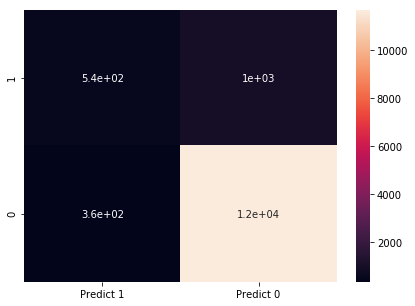

In [62]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [63]:
#K-NN model performance is around 90% and it is almost same to Logistic model without class weights. Let's try with other classifiers

In [64]:
#Model 3 -> SVM

In [65]:
from sklearn.svm import SVC

svc_model = SVC(C= .1, kernel='rbf', gamma= 1)
svc_model.fit(X_train, Y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
#Performance of the model
print(svc_model.score(X_train,Y_train))
print(svc_model.score(X_test,Y_test))

0.8818845388188454
0.8856531996461221


In [67]:
#Accuracy of the SVM model
svm_predict_train = svc_model.predict(X_train)
svm_predict_test = svc_model.predict(X_test)
SVM_accuracy_score_train = metrics.accuracy_score(Y_train,svm_predict_train)
SVM_accuracy_score_test = metrics.accuracy_score(Y_test,svm_predict_test)
print(SVM_accuracy_score_train)
print(SVM_accuracy_score_test)

0.8818845388188454
0.8856531996461221


In [68]:
#Confusion Matrix
cm = metrics.confusion_matrix(Y_test,svm_predict_test, labels=[1,0])
cm

array([[    0,  1551],
       [    0, 12013]], dtype=int64)

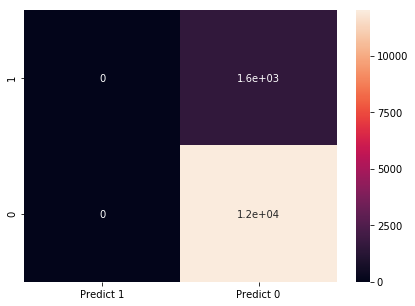

In [69]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [70]:
#SVM takes huge time to compute the results. We are getting performance around 88% with class weight which is better than logistic model.

In [71]:
#Model 4 -> Decision Tree

In [72]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [73]:
#Performance of the model
print(dTree.score(X_train,Y_train))
print(dTree.score(X_test,Y_test))

1.0
0.8730462990268357


In [74]:
#Model is overfitting so we can regularize

In [75]:
dTree = DecisionTreeClassifier(criterion = 'gini',max_depth=7, random_state=1)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [76]:
#Performance of the model
print(dTree.score(X_train,Y_train))
print(dTree.score(X_test,Y_test))

0.9126299491262995
0.9026098496018874


In [77]:
#Accuracy of the Decision Tree model
dt_predict_train = dTree.predict(X_train)
dt_predict_test = dTree.predict(X_test)
DT_accuracy_score_train = metrics.accuracy_score(Y_train,dt_predict_train)
DT_accuracy_score_test = metrics.accuracy_score(Y_test,dt_predict_test)
print(DT_accuracy_score_train)
print(DT_accuracy_score_test)

0.9126299491262995
0.9026098496018874


In [78]:
#Recall score
DT_recall_score_train = metrics.recall_score(Y_train,dt_predict_train)
DT_recall_score_test = metrics.recall_score(Y_test,dt_predict_test)
print(DT_recall_score_train)
print(DT_recall_score_test)

0.4521134296415195
0.3900709219858156


In [79]:
#Confusion Matrix
cm = metrics.confusion_matrix(Y_test,dt_predict_test, labels=[1,0])
cm

array([[  605,   946],
       [  375, 11638]], dtype=int64)

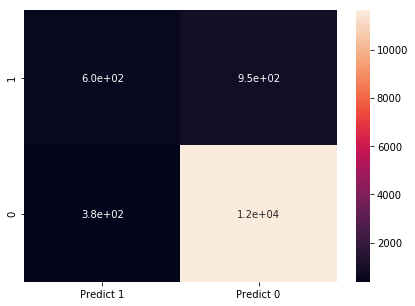

In [80]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [81]:
#Checking feature importance
print(pd.DataFrame(dTree.feature_importances_,columns=["Imp"],index=X_train.columns))

                        Imp
age                0.052833
job                0.004488
education          0.001688
default            0.000000
balance            0.005929
housing            0.006954
loan               0.002823
day                0.018542
duration           0.517189
campaign           0.007045
pdays              0.033729
previous           0.003609
poutcome_failure   0.000000
poutcome_other     0.000000
poutcome_success   0.242428
poutcome_unknown   0.000000
month_apr          0.000989
month_aug          0.001355
month_dec          0.001272
month_feb          0.000571
month_jan          0.000000
month_jul          0.000000
month_jun          0.005436
month_mar          0.029087
month_may          0.009618
month_nov          0.001317
month_oct          0.027207
month_sep          0.003277
contact_cellular   0.004206
contact_telephone  0.000000
contact_unknown    0.014531
marital_divorced   0.001741
marital_married    0.002136
marital_single     0.000000


In [82]:
#For Decision Tree model, performance is around 90.3% without class weight and if we add class weight then we are getting around 80% with better recall. Lets explore ensemble techniques to check performance.

In [83]:
#Now we can use Ensemble Techinques 

In [84]:
#Techniques 1 -> Bagging classifier

In [85]:
bagging = BaggingClassifier(base_estimator=dTree,n_estimators=50,random_state=1)
bagging.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [86]:
#Performance of the model
print(bagging.score(X_train,Y_train))
print(bagging.score(X_test,Y_test))

0.9156318134420324
0.9061486287230905


In [87]:
#Accuracy of the Bagging Techniques
bag_predict_train = bagging.predict(X_train)
bag_predict_test = bagging.predict(X_test)
BAG_accuracy_score_train = metrics.accuracy_score(Y_train,bag_predict_train)
BAG_accuracy_score_test = metrics.accuracy_score(Y_test,bag_predict_test)
print(BAG_accuracy_score_train)
print(BAG_accuracy_score_test)

0.9156318134420324
0.9061486287230905


In [88]:
#Confusion Matrix
cm = metrics.confusion_matrix(Y_test,bag_predict_test, labels=[1,0])
cm

array([[  599,   952],
       [  321, 11692]], dtype=int64)

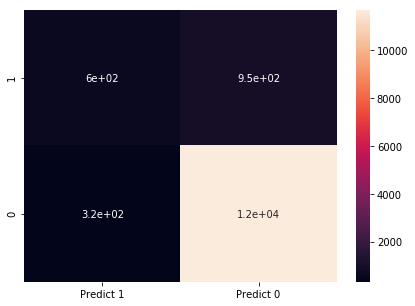

In [89]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [90]:
#Bagging using Logistic regression model
bagging = BaggingClassifier(base_estimator=logreg,n_estimators=50,random_state=1)
bagging.fit(X_train,Y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [91]:
#Performance of the model
print(bagging.score(X_train,Y_train))
print(bagging.score(X_test,Y_test))

0.8448510127342244
0.8434090238867591


In [92]:
#Through Bagging techiques, we are gettin better performance of 90.6% and 84.3% with Decision tree and logistic regression model respectively. These performance values are better than base estimator.

In [93]:
#Techniques 2 -> AdaBoosting

In [94]:
AB = AdaBoostClassifier(base_estimator=dTree,n_estimators=15,random_state=1)
AB.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          learning_rate=1.0, n_estimators=15, random_state=1)

In [95]:
#Performance of the model
print(AB.score(X_train,Y_train))
print(AB.score(X_test,Y_test))

0.949410686636964
0.8894131524624005


In [96]:
#Accuracy of the AdaBoosting Techniques
ab_predict_train = AB.predict(X_train)
ab_predict_test = AB.predict(X_test)
AB_accuracy_score_train = metrics.accuracy_score(Y_train,ab_predict_train)
AB_accuracy_score_test = metrics.accuracy_score(Y_test,ab_predict_test)
print(AB_accuracy_score_train)
print(AB_accuracy_score_test)

0.949410686636964
0.8894131524624005


In [97]:
#Confusion Matrix
cm = metrics.confusion_matrix(Y_test,ab_predict_test, labels=[1,0])
cm

array([[  705,   846],
       [  654, 11359]], dtype=int64)

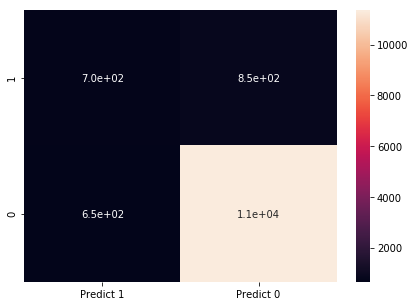

In [98]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [99]:
#AdaBoosting using Logistic Regression model
AB = AdaBoostClassifier(base_estimator=logreg,n_estimators=15,random_state=1)
AB.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=15, random_state=1)

In [100]:
#Performance of the model
print(AB.score(X_train,Y_train))
print(AB.score(X_test,Y_test))

0.822763611084779
0.8207018578590386


In [101]:
#Through AdaBoosting techiques, we are gettin performance of 89% and 82% with Decision tree and logistic regression models respectively. These performance values are lesser than base estimator.

In [102]:
#Techniques 3 -> Gradient Boosting

In [103]:
GB = GradientBoostingClassifier(n_estimators=50,random_state=1)
GB.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [104]:
#Performance of the model
print(GB.score(X_train,Y_train))
print(GB.score(X_test,Y_test))

0.907100199071002
0.904379239162489


In [105]:
#Accuracy of the Gradient Boosting Techniques
gb_predict_train = GB.predict(X_train)
gb_predict_test = GB.predict(X_test)
GB_accuracy_score_train = metrics.accuracy_score(Y_train,gb_predict_train)
GB_accuracy_score_test = metrics.accuracy_score(Y_test,gb_predict_test)
print(GB_accuracy_score_train)
print(GB_accuracy_score_test)

0.907100199071002
0.904379239162489


In [106]:
#Confusion Matrix
cm = metrics.confusion_matrix(Y_test,gb_predict_test, labels=[1,0])
cm

array([[  557,   994],
       [  303, 11710]], dtype=int64)

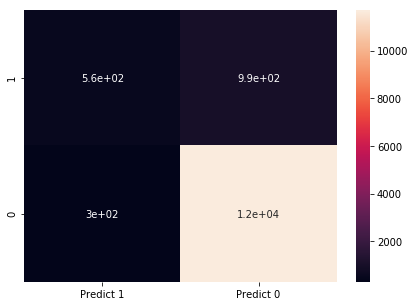

In [107]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [108]:
#Through Gradient Boosting techiques, we are gettin better performance of 90.4% and this performance value is similar to Decision tree model.

In [109]:
#Techniques 4 -> Random Forest

In [139]:
RF = RandomForestClassifier(n_estimators=50,random_state=1,max_features=12)
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [140]:
#Performance of the model
print(RF.score(X_train,Y_train))
print(RF.score(X_test,Y_test))

0.9998104085695326
0.9084340902388676


In [141]:
#Above Random Forest seems like overfitting so we can regularize it
RF = RandomForestClassifier(n_estimators=50,random_state=1,max_features=15,max_depth=4)
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [142]:
#Performance of the model
print(RF.score(X_train,Y_train))
print(RF.score(X_test,Y_test))

0.9009700761525579
0.9026098496018874


In [143]:
#Accuracy of the Random Forest Techniques
rf_predict_train = RF.predict(X_train)
rf_predict_test = RF.predict(X_test)
RF_accuracy_score_train = metrics.accuracy_score(Y_train,rf_predict_train)
RF_accuracy_score_test = metrics.accuracy_score(Y_test,rf_predict_test)
print(RF_accuracy_score_train)
print(RF_accuracy_score_test)

0.9009700761525579
0.9026098496018874


In [144]:
#Confusion Matrix
cm = metrics.confusion_matrix(Y_test,rf_predict_test, labels=[1,0])
cm

array([[  402,  1149],
       [  172, 11841]], dtype=int64)

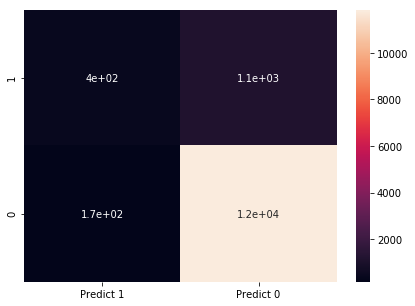

In [145]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [146]:
#Random Forest with class weight
RF = RandomForestClassifier(n_estimators=50,random_state=1,max_features=15,max_depth=4,class_weight='balanced')
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features=15,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [147]:
#Performance of the model
print(RF.score(X_train,Y_train))
print(RF.score(X_test,Y_test))

0.7863304578633046
0.7831760542612799


In [148]:
#Accuracy of the Random Forest Techniques
rf_predict_train = RF.predict(X_train)
rf_predict_test = RF.predict(X_test)
RF_accuracy_score_train = metrics.accuracy_score(Y_train,rf_predict_train)
RF_accuracy_score_test_b = metrics.accuracy_score(Y_test,rf_predict_test)
RF_recall_score_train = metrics.recall_score(Y_train,rf_predict_train)
RF_recall_score_test = metrics.recall_score(Y_test,rf_predict_test)
print(RF_accuracy_score_train)
print(RF_accuracy_score_test_b)
print(RF_recall_score_train)
print(RF_recall_score_test)

0.7863304578633046
0.7831760542612799
0.8440342429106474
0.8381689232753062


In [149]:
#Through Random Forest, we are getting perfromance around 90.2% and 78.3% for without class weignt and with class weight respectively. Here without class weight performance is almost similar to Decision tree model.

In [153]:
#Performance and accuracy of each model trained above
#Logistic Regression:
print('Logistic Regression:')
print('Accuracy score of the model with class weight', LG_accuracy_score_test)
#KNN
print('\nKNN:')
print('Accuracy score of the model', KNN_accuracy_score_test)
#SVN
print('\nSVM:')
print('Accuracy score of the model', SVM_accuracy_score_test)
#Decision Tress
print('\nDecision Tree:')
print('Accuracy score of the model', DT_accuracy_score_test)
#Bagging
print('\nBagging:')
print('Accuracy score of the model', BAG_accuracy_score_test)
#Ada Boosting
print('\nAda Boosting:')
print('Accuracy score of the model', AB_accuracy_score_test)
#Gradient Boosting
print('\nGradient Boosting:')
print('Accuracy score of the model', GB_accuracy_score_test)
#Random Forest
print('\nRandom Forest:')
print('Accuracy score of the model', RF_accuracy_score_test)
print('Accuracy score of the model with class weight', RF_accuracy_score_test_b)

Logistic Regression:
Accuracy score of the model with class weight 0.8431878501916839

KNN:
Accuracy score of the model 0.8992922441757594

SVM:
Accuracy score of the model 0.8856531996461221

Decision Tree:
Accuracy score of the model 0.9026098496018874

Bagging:
Accuracy score of the model 0.9061486287230905

Ada Boosting:
Accuracy score of the model 0.8894131524624005

Gradient Boosting:
Accuracy score of the model 0.904379239162489

Random Forest:
Accuracy score of the model 0.9026098496018874
Accuracy score of the model with class weight 0.7831760542612799
